In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/aiffel/data/trip.csv')

In [3]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [5]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


# 1. 결측치 판단 및 처리
- [힌트] 결측치의 유무와 비율을 살펴보고 적절한 방법으로 처리합니다.

In [6]:
# 결측치 유무 살펴보기
data.isna()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
22696,False,False,False,False,False,False,False,False,False
22697,False,False,False,False,False,False,False,False,False
22698,False,False,False,False,False,False,False,False,False
22699,False,False,False,False,False,False,False,False,False


In [7]:
# 결측치 비율 살펴보기
data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [8]:
# fare_amount에서 결측치를 확인하였으며 인덱싱
fare_amount_na_index = data[data['fare_amount'].isna()].index

In [9]:
# fare_amount 결측치 출력
data.loc[fare_amount_na_index]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [10]:
# fare_amount 결측치를 모두 제거 
# data.dropna(subset = ['fare_amount'])

In [11]:
# fare_amount 결측치를 median값으로 채우기
data['fare_amount'] = data['fare_amount'].fillna(data['fare_amount'].median())

# 2. 이상치 판단 및 처리
- [힌트] 숫자형 변수 각각에 대해, 데이터의 index와 변수 값 사이의 scatter plot을 그려보고 이상치가 관찰될 경우 제거합니다.

In [12]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.023543,1.835745,0.312514
std,1.304942,3.653023,13.239261,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


## 숫자형 변수
passenger_count: int64<br>
trip_distance, fare_amount, tip_amount, tolls_amount: float64

데이터 분포를 이해를 위해 각 숫자형 변수에 대해 IQR(Interquartile Range)을 구하고 scatterplot을 그려보고 이상치 제거 시행.

In [13]:
# # IQR = 75% - 25% IQR * 1.5 (LMS에 나온 수식)
# IQR = (3.060000 - 0.990000) * 1.5
# IQR

In [14]:
# 숫자 변수 선택
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# 각 숫자 변수의 IQR 계산
IQR = {}
lower_bound = {}
upper_bound = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR[col] = Q3 - Q1
    # 상한과 하한 설정
    lower_bound[col] = Q1 - 1.5 * IQR[col]
    upper_bound[col] = Q3 + 1.5 * IQR[col]
    print(col, IQR[col], lower_bound[col], upper_bound[col])

# IQR, lower_bound, upper_bound

passenger_count 1.0 -0.5 3.5
trip_distance 2.0700000000000003 -2.115 6.165000000000001
fare_amount 8.0 -5.5 26.5
tip_amount 2.45 -3.6750000000000003 6.125
tolls_amount 0.0 0.0 0.0


### (1) passenger_count

<AxesSubplot:ylabel='passenger_count'>

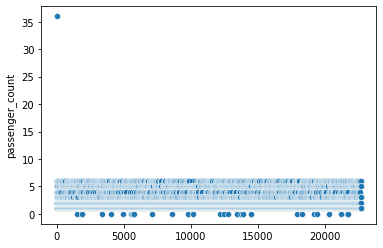

In [15]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

In [16]:
# 10 이상인 값이 이상치로 보이므로 제거
data = data[data['passenger_count'] <= 10]

<AxesSubplot:ylabel='passenger_count'>

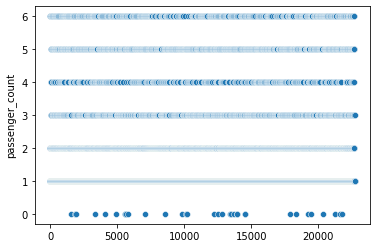

In [17]:
# 이상치 제거 후 scatterplot 다시 그려보기
sns.scatterplot(x = data.index, y = data['passenger_count'])

### (2) trip_distance

<AxesSubplot:ylabel='trip_distance'>

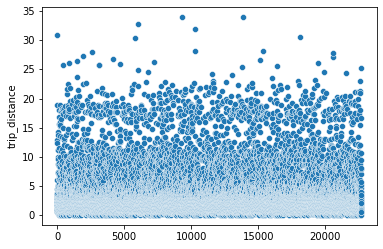

In [18]:
sns.scatterplot(x = data.index, y = data['trip_distance'])

특별한 이상치는 발견되지 않으므로 제거하지 않음

### (3) fare_amount

<AxesSubplot:ylabel='fare_amount'>

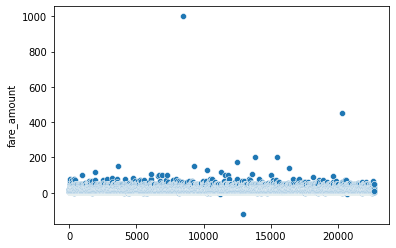

In [19]:
sns.scatterplot(x = data.index, y = data['fare_amount'])

In [20]:
# 400 이상인 값이 이상치로 보이므로 제거
data = data[data['fare_amount'] <= 400]

<AxesSubplot:ylabel='fare_amount'>

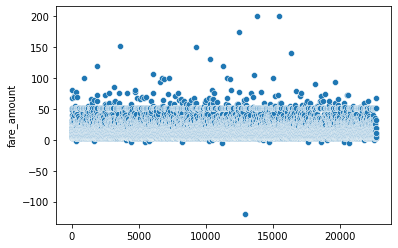

In [21]:
# 이상치 제거 후 scatterplot 다시 그려보기
sns.scatterplot(x = data.index, y = data['fare_amount'])

In [22]:
# 0 이하인 값이 이상치로 보이므로 제거
data = data[data['fare_amount'] > 0]

<AxesSubplot:ylabel='fare_amount'>

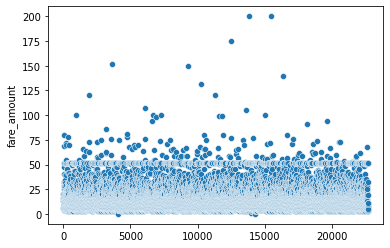

In [23]:
# 이상치 제거 후 scatterplot 다시 그려보기
sns.scatterplot(x = data.index, y = data['fare_amount'])

### (4) tip_amount

<AxesSubplot:ylabel='tip_amount'>

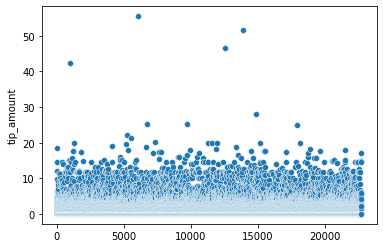

In [24]:
sns.scatterplot(x = data.index, y = data['tip_amount'])

큰 값이 있으나, 팁은 많이 줄수도 있으므로 그대로 둠

### (5) tolls_amount

<AxesSubplot:ylabel='tolls_amount'>

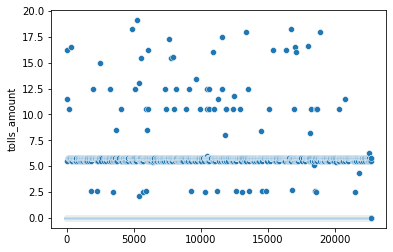

In [25]:
sns.scatterplot(x = data.index, y = data['tolls_amount'])

분포가 넓으나 이상치라고 하기엔 어려워 제거하지 않음

# 3. 택시 탑승 및 하차 시간을 활용할 수 있을지 고민해보세요.
- [힌트] 택시의 주행 시간과 주행 거리, 요금 등의 상관 관계도 살펴볼 수 있겠죠?

In [26]:
data['tpep_dropoff_datetime']

0         03/25/2017 9:09:47 AM
1         04/11/2017 3:19:58 PM
2         12/15/2017 7:34:08 AM
3         05/07/2017 1:48:14 PM
4        04/15/2017 11:49:03 PM
                  ...          
22696     02/24/2017 5:40:39 PM
22697     08/06/2017 5:24:47 PM
22698     09/04/2017 2:58:22 PM
22699     07/15/2017 1:08:26 PM
22700     03/02/2017 1:16:09 PM
Name: tpep_dropoff_datetime, Length: 22678, dtype: object

In [27]:
# 택시 주행 시간 계산
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [28]:
# 택시 dropoff 시간에서 pickup 시간을 뺀 시간을 초 단위로 변경한 후 시간으로 재변경
data['driving_time'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / (60 * 60)

In [29]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,driving_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.00,0.234444
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.00,0.441667
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.00,0.120000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,0.504167
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.00,0.278611
...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,0.054444
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,0.680000
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0.00,0.00,0.068889
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,1.70,0.00,0.198889


<AxesSubplot:xlabel='driving_time'>

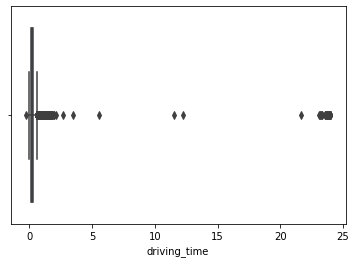

In [30]:
sns.boxplot(x=data['driving_time'])

In [31]:
# 10시간 이상의 데이터 살펴보기
data[data['driving_time']>10]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,driving_time
699,Scott Garcia,2017-06-10 21:55:01,2017-06-11 21:45:51,Debit Card,1,1.36,8.5,1.47,0.00,23.847222
926,Michael Perez,2017-02-09 23:24:58,2017-02-10 23:24:31,Cash,5,4.86,17.5,0.00,0.00,23.992500
1012,James Anderson,2017-12-08 07:17:20,2017-12-09 07:07:22,Cash,1,0.33,4.5,0.00,0.00,23.833889
1201,Carla Allen,2017-11-12 19:52:44,2017-11-13 19:37:35,Credit Card,1,4.14,18.0,3.76,0.00,23.747500
1357,Jamie Collins,2017-04-17 21:26:49,2017-04-18 20:46:13,Cash,6,4.09,15.0,0.00,0.00,23.323333
1760,Ronald Kidd,2017-12-28 23:58:24,2017-12-29 23:38:45,Cash,1,1.23,7.0,1.66,0.00,23.672500
4602,Brandon Miller,2017-12-20 08:24:34,2017-12-21 07:39:27,Cash,4,1.26,10.0,0.00,0.00,23.248056
5372,Catherine Ray,2017-12-13 19:40:05,2017-12-14 19:31:09,Cash,3,0.93,12.0,2.07,0.00,23.851111
5480,Patricia Galvan,2017-09-19 13:16:13,2017-09-20 12:36:12,Credit Card,1,0.62,5.5,0.00,0.00,23.333056
6495,Travis Tucker,2017-06-27 16:52:07,2017-06-28 16:49:57,Cash,1,15.60,52.0,0.00,0.00,23.963889


In [32]:
# 20시간 이상의 데이터 살펴보기
data[data['driving_time']>20]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,driving_time
699,Scott Garcia,2017-06-10 21:55:01,2017-06-11 21:45:51,Debit Card,1,1.36,8.5,1.47,0.00,23.847222
926,Michael Perez,2017-02-09 23:24:58,2017-02-10 23:24:31,Cash,5,4.86,17.5,0.00,0.00,23.992500
1012,James Anderson,2017-12-08 07:17:20,2017-12-09 07:07:22,Cash,1,0.33,4.5,0.00,0.00,23.833889
1201,Carla Allen,2017-11-12 19:52:44,2017-11-13 19:37:35,Credit Card,1,4.14,18.0,3.76,0.00,23.747500
1357,Jamie Collins,2017-04-17 21:26:49,2017-04-18 20:46:13,Cash,6,4.09,15.0,0.00,0.00,23.323333
1760,Ronald Kidd,2017-12-28 23:58:24,2017-12-29 23:38:45,Cash,1,1.23,7.0,1.66,0.00,23.672500
4602,Brandon Miller,2017-12-20 08:24:34,2017-12-21 07:39:27,Cash,4,1.26,10.0,0.00,0.00,23.248056
5372,Catherine Ray,2017-12-13 19:40:05,2017-12-14 19:31:09,Cash,3,0.93,12.0,2.07,0.00,23.851111
5480,Patricia Galvan,2017-09-19 13:16:13,2017-09-20 12:36:12,Credit Card,1,0.62,5.5,0.00,0.00,23.333056
6495,Travis Tucker,2017-06-27 16:52:07,2017-06-28 16:49:57,Cash,1,15.60,52.0,0.00,0.00,23.963889


In [33]:
long_driving = data[data['driving_time']>20]

<AxesSubplot:xlabel='trip_distance', ylabel='driving_time'>

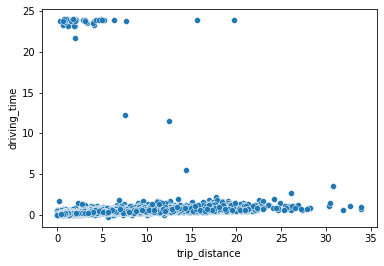

In [34]:
sns.scatterplot(x = data['trip_distance'], y = data['driving_time'])

<AxesSubplot:xlabel='trip_distance', ylabel='driving_time'>

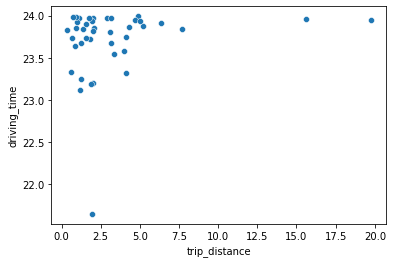

In [35]:
sns.scatterplot(x = long_driving['trip_distance'], y = long_driving['driving_time'])

<AxesSubplot:xlabel='driving_time', ylabel='trip_distance'>

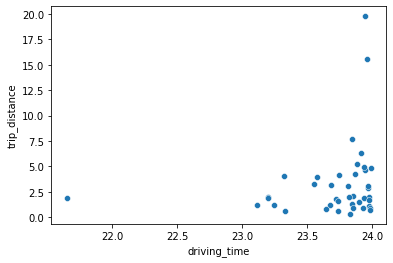

In [36]:
sns.scatterplot(x = long_driving['driving_time'], y = long_driving['trip_distance'])

In [37]:
# 주행 시간과 거리 상관관계가 없는 데이터가 다수 있어서 주행 시간 당 거리를 확인하기 위한 컬럼 추가
data['distance_per_hour'] = data['trip_distance'] / data['driving_time']

# 주행 시간당 거리 확인
print(data[['driving_time', 'trip_distance', 'distance_per_hour']].head())

   driving_time  trip_distance  distance_per_hour
0      0.234444           3.34          14.246445
1      0.441667           1.80           4.075472
2      0.120000           1.00           8.333333
3      0.504167           3.70           7.338843
4      0.278611           4.37          15.684945


In [38]:
# driving_time 이 음수인 데이터 확인
data[data['driving_time']<0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,driving_time,distance_per_hour
9358,Donna Summers,2017-11-05 01:23:08,2017-11-05 01:06:09,Cash,1,5.7,28.0,0.0,0.0,-0.283056,-20.13739


In [39]:
# driving_time이 0보다 작은 행 삭제
data = data[data['driving_time'] > 0]

In [40]:
data['distance_per_hour'].describe()

count    22651.000000
mean        13.775641
std        146.930003
min          0.000000
25%          7.252407
50%          9.840000
75%         13.605828
max      15120.000000
Name: distance_per_hour, dtype: float64

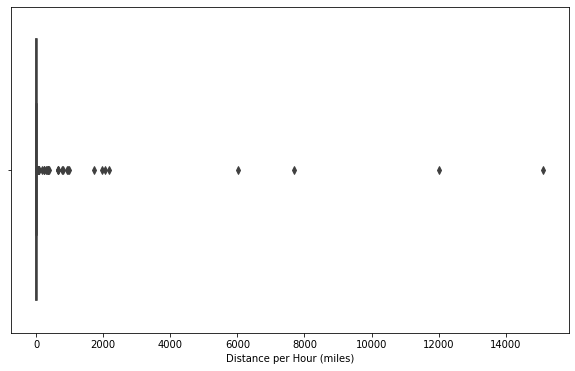

In [41]:
# 주행 시간당 거리 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['distance_per_hour'])
plt.xlabel('Distance per Hour (miles)')
plt.show()

<AxesSubplot:ylabel='driving_time'>

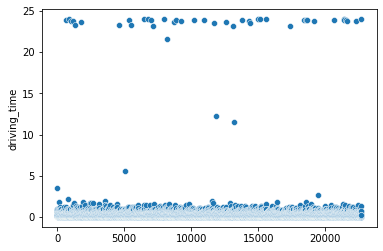

In [42]:
sns.scatterplot(x = data.index, y = data['driving_time'])

In [43]:
# 제시한 변수에 대한 상관 관계 계산
data[['trip_distance', 'fare_amount', 'driving_time']].corr()

,trip_distance,fare_amount,driving_time
trip_distance,1.000000,0.907343,0.155576
fare_amount,0.907343,1.000000,0.168778
driving_time,0.155576,0.168778,1.000000


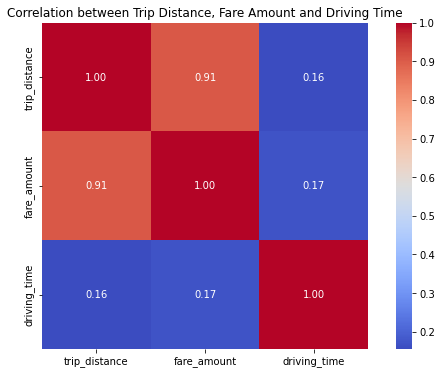

In [44]:
# 상관 관계 계산
correlation = data[['trip_distance', 'fare_amount', 'driving_time']].corr()

# 상관 관계 행렬 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation between Trip Distance, Fare Amount and Driving Time')
plt.show()

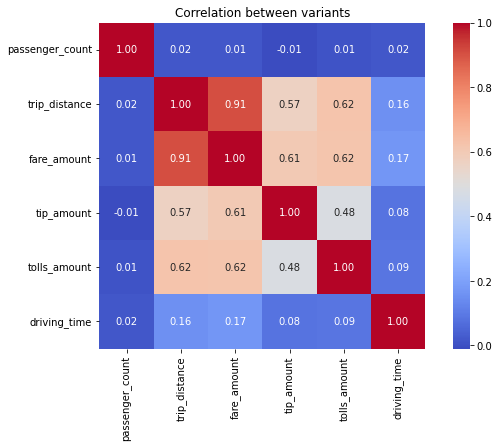

In [45]:
# 모든 숫자형 변수에 상관 관계 계산
correlation = data[['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'driving_time']].corr()

# 상관 관계 행렬 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation between variants')
plt.show()

In [46]:
np.corrcoef(data['driving_time'],data['trip_distance'])[0,1]

0.15557585915369743

<AxesSubplot:ylabel='trip_distance'>

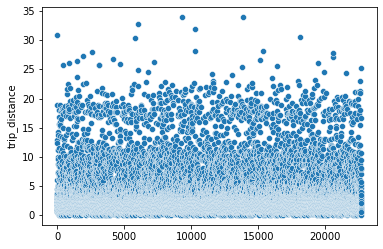

In [47]:
sns.scatterplot(x = data['driving_time'].index, y = data['trip_distance'])

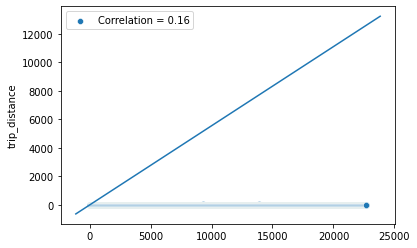

In [48]:
# trip_distance 에 따른 driving_time 의 상관관계를 시각화
x_data = data['driving_time']
y_data = data['trip_distance']
sns.scatterplot(x = data['driving_time'].index, y = data['trip_distance'], label=f'Correlation = {np.round(np.corrcoef(x_data,y_data)[0,1], 2)}')

ax = plt.gca() # Get a matplotlib's axes instance
# adds the correlation line:
m, b = np.polyfit(x_data, y_data, 1)
X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')

plt.show()


<AxesSubplot:ylabel='fare_amount'>

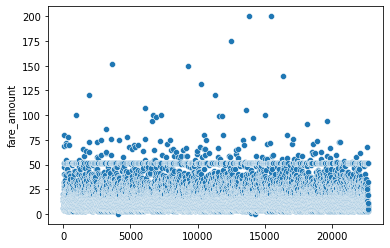

In [49]:
sns.scatterplot(x = data['driving_time'].index, y = data['fare_amount'])

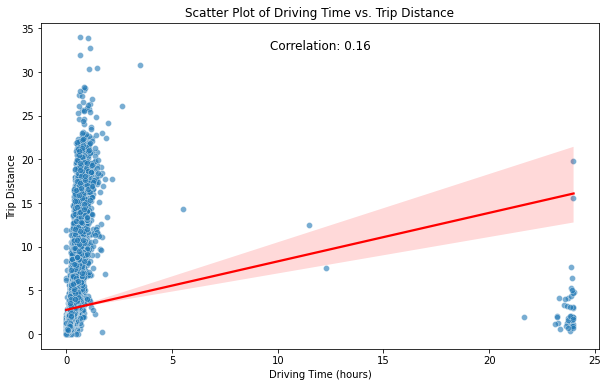

In [50]:
# driving_time과 trip_distance 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='driving_time', y='trip_distance', data=data, alpha=0.6)

# 상관 계수 계산
correlation = data['driving_time'].corr(data['trip_distance'])

# 회귀선 추가
sns.regplot(x='driving_time', y='trip_distance', data=data, scatter=False, color='red')

# 그래프 제목과 레이블 추가
plt.title('Scatter Plot of Driving Time vs. Trip Distance')
plt.xlabel('Driving Time (hours)')
plt.ylabel('Trip Distance')

# 상관 계수 텍스트 추가
plt.text(0.5, 0.95, f'Correlation: {correlation:.2f}', ha='center', va='top', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.show()

In [51]:
# 10 시간 미만인 자료만 사용하기
short_driving = data[data['driving_time']<10]

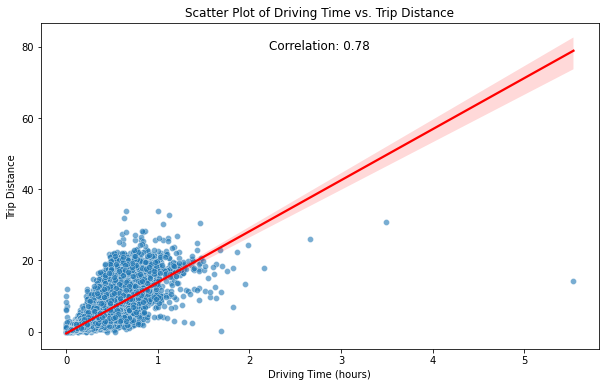

In [52]:
# driving_time과 trip_distance 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='driving_time', y='trip_distance', data=short_driving, alpha=0.6)

# 상관 계수 계산
correlation = short_driving['driving_time'].corr(short_driving['trip_distance'])

# 회귀선 추가
sns.regplot(x='driving_time', y='trip_distance', data=short_driving, scatter=False, color='red')

# 그래프 제목과 레이블 추가
plt.title('Scatter Plot of Driving Time vs. Trip Distance')
plt.xlabel('Driving Time (hours)')
plt.ylabel('Trip Distance')

# 상관 계수 텍스트 추가
plt.text(0.5, 0.95, f'Correlation: {correlation:.2f}', ha='center', va='top', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.show()

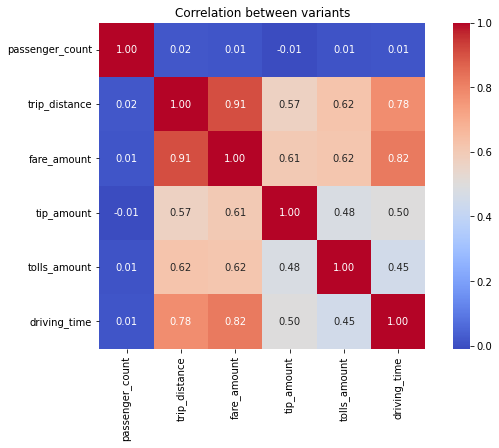

In [53]:
# 모든 숫자형 변수에 상관 관계 계산
correlation = short_driving[['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'driving_time']].corr()

# 상관 관계 행렬 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation between variants')
plt.show()

결론: 택시의 주행 시간이 10시간 이상인 경우는 많지 않을 것으로 예상되며, 10시간이 넘어가면 주행 시간 당 거리와의 상관 관계가 급속히 떨어졌음. 10시간 이하로 보았을 때 주행 시간 (driving_time)에 따른 거리(trip_distance) 및 운행 요금(fare_amount) 상관 관계는 높아졌으나, 이상치 처리 cutoff를 임의로 정하기 어려워 데이터만 살펴보고 처리는 하지 않음

# 4. Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들어 보세요.

In [54]:
# payment_method 컬럼에서 Credit Card와 Debit Card를 Card로 변경
data['payment_method'] = data['payment_method'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'})
data

/tmp/ipykernel_181/3103792845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['payment_method'] = data['payment_method'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'})


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,driving_time,distance_per_hour
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,0.234444,14.246445
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,0.441667,4.075472
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,0.120000,8.333333
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,0.504167,7.338843
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,0.278611,15.684945
...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,0.054444,11.204082
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,0.680000,24.573529
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,0.068889,6.096774
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,0.198889,11.865922


In [55]:
# 결제 수단에 따른 금액 합계 계산
total_amount = data.groupby('payment_method')['fare_amount'].sum()
total_amount

payment_method
Card    149294.17
Cash    144557.26
Name: fare_amount, dtype: float64

In [56]:
# 결제 수단에 따른 금액 평균 계산
average_amount = data.groupby('payment_method')['fare_amount'].mean()
average_amount

payment_method
Card    13.008118
Cash    12.936930
Name: fare_amount, dtype: float64

Card로 계산했을 때 Cash에 비해 평균과 합계 금액이 높았음